# Recompute u/v from psi/khi (Arpege)

In [1]:
# for figures in notebook
%matplotlib inline

# import & initialize epygram
import epygram
epygram.init_env()

In [2]:
import os
INPUTS_DIR = os.path.join(epygram.config.installdir, 'doc_sphinx', 'source', 'gallery', 'inputs')
# open resource in read mode
r = epygram.formats.resource(os.path.join(INPUTS_DIR, 'analysis.full-arpege.tl149-c24.fa'), 'r')

In [15]:
psi = r.readfield('S050FONC.COURANT')
khi = r.readfield('S050POT.VITESSE')
# re-compute u/v from psi/khi
uv = epygram.fields.psikhi2uv(psi, khi)

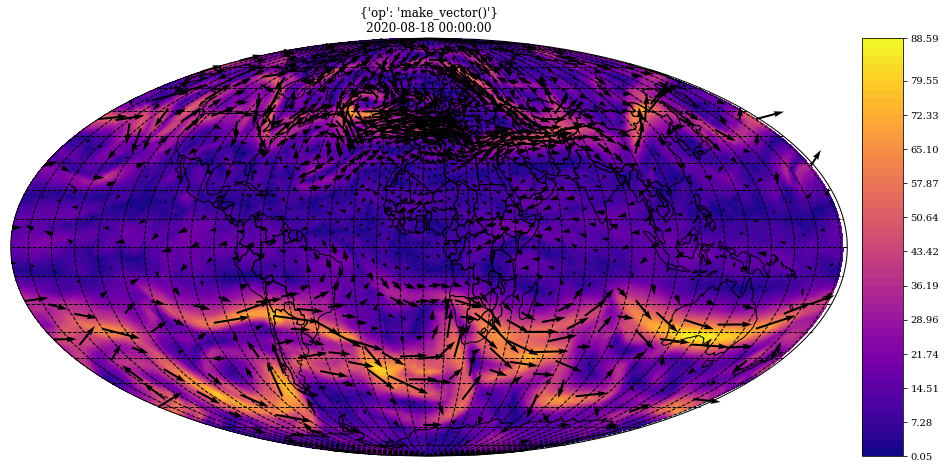

In [7]:
fig, ax = uv.cartoplot(subsampling=5, vector_plot_method='quiver')

# Be careful to projections of wind components !

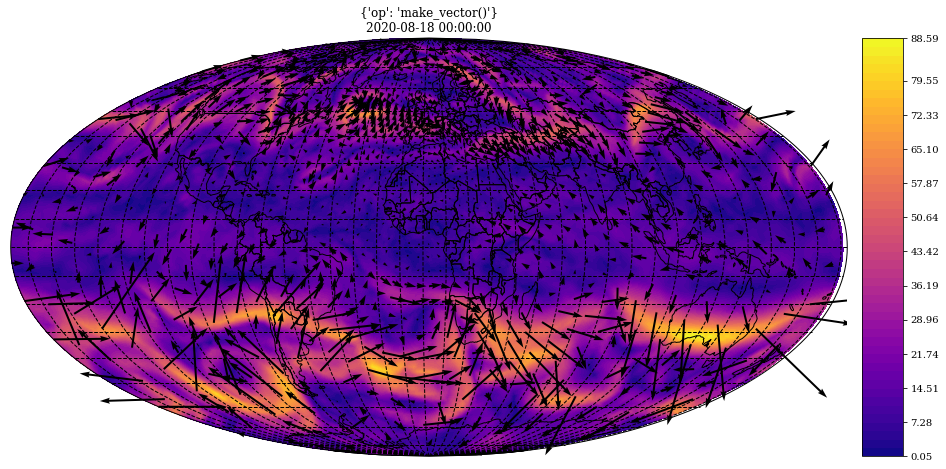

In [10]:
# wrong projection:
fig, ax = uv.cartoplot(subsampling=5, vector_plot_method='quiver', components_are_projected_on='lonlat')

#  and stretched grids !

# [2020/11/20-18:26:45][epygram._plugins.with_cartopy.H2DVectorField][_cartoplot_set_figure_and_module:0049][WARNING]: check carefully *map_factor_correction* w.r.t. dilatation_coef
# [2020/11/20-18:26:46][epygram.geometries.D3Geometry][reproject_wind_on_lonlat:4232][WARNING]: check carefully *map_factor_correction* w.r.t. dilatation_coef


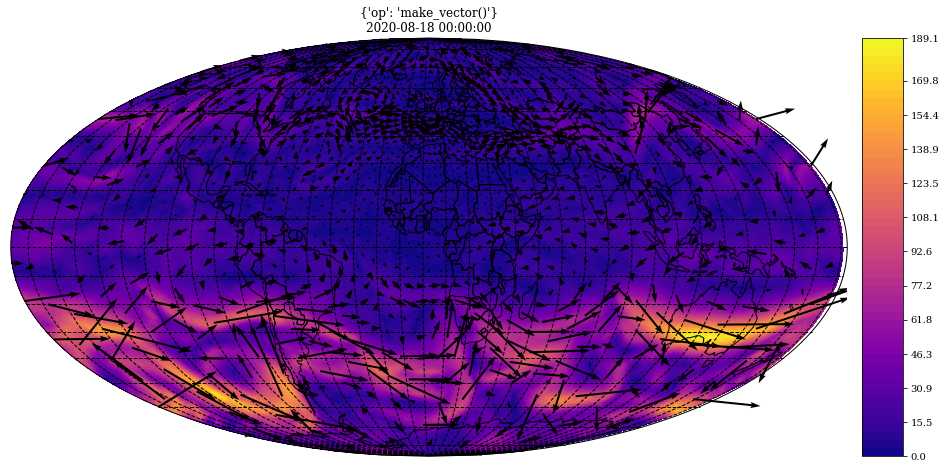

In [13]:
# map factor due to stretching:
fig, ax = uv.cartoplot(subsampling=5, vector_plot_method='quiver', map_factor_correction=False)